# Detecção Facial com FaceNet MTCNN

In [1]:
from facenet_pytorch import MTCNN
from facenet_pytorch import InceptionResnetV1

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import cv2
import os

from PIL import Image

#### Selecionando Device (CPU ou GPU)

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


#### Instanciando modelo MTCNN

Parâmetros de Interesse:

- __image_size__ (_int_) - Tamanho da imagem de saída (quadrada) em pixels. (Padrão: _160_)


- __margin__ (_int_) - Margem (em pixels) a adicionar ao bounding box. (Padrão: _0_)


- __min_face_size__ (_int_) - Tamanho mínimo, em pixels, aceitável da face na imagem. (Padrão: _20_)


- __thresholds__ (_list_) - Limiar de detecção (prob) da MTCNN  (Padrão: _[0.6, 0.7, 0.7]_)


- __factor__ (_float_) - Fator para escalonamento piramidal. (Padrão: _0.709_)
        

- __select_largest__ (_bool_) - Se setado (_True_), quando encontrar múltiplas faces, retorna a de maior tamanho. Se não setado (_False_), retorna a face de maior probabilidade. (Padrão: _True_)


- __selection_method__ (_string_) - Método heurístico usado para detecção. Se informado, sobreescreve o parâmetro ```select_largest```. (Padrão: _None_). Opções:

        - "probability": highest probability selected
        - "largest": largest box selected
        - "largest_over_theshold": largest box over a certain probability selected
        - "center_weighted_size": box size minus weighted squared offset from image center


- __keep_all__ (_bool_) - Se setado (_True_), todas as faces encontradas serão retornadas, ordenadas pelo parâmetro ```select_largest```. (Padrão: _False_)


- __device__ (_torch.device_) -- Dispositivo onde o modelo será executado. (Padrão: _None_)

In [3]:
face_detection_model = MTCNN(
    image_size=160,
    margin=0,
    min_face_size=20,
    thresholds=[0.6, 0.7, 0.7],
    factor=0.709,
    select_largest=True,
    selection_method=None,
    keep_all=False,
    device=device,
)

## Carregando imagem de teste

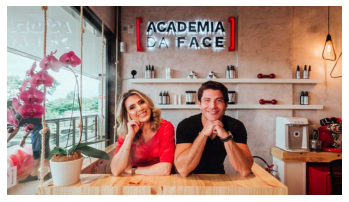

In [4]:
# Image path
impath = 'test_imgs/face-3.jpg'

# Read image file
orig_img = cv2.imread(filename=impath, flags=cv2.IMREAD_COLOR)

# Convert BGR to RGB color channel
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Display original image
plt.figure()
plt.imshow(orig_img)
plt.axis(False)
plt.show()

## Exemplo 1: Retornando face detectada

In [5]:
# Detect face
cropped_face = face_detection_model(orig_img)

if cropped_face is not None:
    # Convert Torch.Tensor to Numpy.Array
    cropped_face = cropped_face.cpu().detach().numpy()
    
    # Change color channel order (CHW to HWC)
    cropped_face = np.transpose(cropped_face, axes=(1, 2, 0))
    
    # Normalize detected face (float32 to uint8)
    cropped_face = cv2.normalize(src=cropped_face, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
else:
    print('Face não encontrada!')

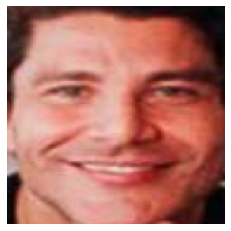

In [6]:
# Display cropped face
plt.figure()
plt.imshow(cropped_face)
plt.axis(False)
plt.show()

## Exemplo 2: Retornando Bounding Boxes e Probabilidades

Conf: 1.000, BBox: [739 314 831 436]
Conf: 1.000, BBox: [455 339 551 445]
Conf: 0.761, BBox: [857 220 878 246]


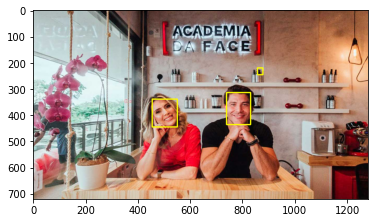

In [7]:
boxes, probs = face_detection_model.detect(img=orig_img, landmarks=False)

proc_img = orig_img.copy()

if boxes is not None:
    for box, prob in zip(boxes, probs):
        # Round box values, and cast to unsigned int
        box = np.round(box).astype('uint')
        x0, y0, x1, y1 = box
        
        # Draw rectangle on image
        proc_img = cv2.rectangle(img=proc_img, pt1=(x0, y0), pt2=(x1, y1), color=(255, 255, 0), thickness=3)
        print(f'Conf: {prob:.3f}, BBox: {box}')
        
# Display original image with detected faces
plt.figure()
plt.imshow(proc_img)
plt.show()